# Classification template

## Step 1 - Preprocessing

In [ ]:
# Imports
import pandas as pd
import numpy as np # Not always necessary
import matplotlib.pyplot as plt # Not always necessary
import seaborn as sns # Not always necessary
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [14]:
# Import & visualize dataset
df = pd.read_csv("/Users/qxzjy/vscworkspace/dse-ft-100/ml_module/data/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [15]:
# Print the shape of dataset in the form of (#rows, #columns)
print(df.shape)

# Describe dataset's main statistics
print(df.describe(include="all"))

(400, 5)
             User ID  Gender         Age  EstimatedSalary   Purchased
count   4.000000e+02     400  400.000000       400.000000  400.000000
unique           NaN       2         NaN              NaN         NaN
top              NaN  Female         NaN              NaN         NaN
freq             NaN     204         NaN              NaN         NaN
mean    1.569154e+07     NaN   37.655000     69742.500000    0.357500
std     7.165832e+04     NaN   10.482877     34096.960282    0.479864
min     1.556669e+07     NaN   18.000000     15000.000000    0.000000
25%     1.562676e+07     NaN   29.750000     43000.000000    0.000000
50%     1.569434e+07     NaN   37.000000     70000.000000    0.000000
75%     1.575036e+07     NaN   46.000000     88000.000000    1.000000
max     1.581524e+07     NaN   60.000000    150000.000000    1.000000


In [16]:
# Separate target variable Y from features X
## Choose the columns you want to have as your features
features_list = ['Gender', 'Age', 'EstimatedSalary']

print("Splitting dataset into X and y...")
X = df.loc[:,features_list] # We add feature_list into our loc 

y = df.loc[:,"Purchased"] # We set "Purchased" as the target variable
print("...Done.")

Splitting dataset into X and y...
...Done.


In [17]:
# Divide dataset Train set & Test set 
## First we import train_test_split


print("Splitting dataset into train set and test set...")
## Then we use train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    stratify=y) # Allows you to stratify your sample. 
                                                                # Meaning, you will have the same
                                                                # proportion of categories in test 
                                                                # and train set

print("...Done.")                                                                

Splitting dataset into train set and test set...
...Done.


In [18]:
### Training pipeline ###
print("--- Training pipeline ---")
print()  

# Encoding categorical features and standardizing numeric features

print("#### X_train BEFORE preprocessing ####")
print(X_train.head())
print()

print("Encoding categorical features and standardizing numerical features...")
## First let's import libraries
## StandardScaler to scale data (i.e apply Z-score)
## OneHotEncoder to encode categorical variables


numeric_features = [1, 2] # Choose which column index we are going to scale
numeric_transformer = StandardScaler()

categorical_features = [0] # Choose which column index we are going to encode
categorical_transformer = OneHotEncoder()

# Apply ColumnTransformer to create a pipeline that will apply the above preprocessing
feature_encoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),    
        ('num', numeric_transformer, numeric_features)
        ]
    )

X_train = feature_encoder.fit_transform(X_train)
print("...Done.")
print("#### X_train AFTER preprocessing ####")
print(X_train[0:5,:]) # print first 5 rows (not using iloc since now X_train became a numpy array)
print()

--- Training pipeline ---

#### X_train BEFORE preprocessing ####
     Gender  Age  EstimatedSalary
213    Male   35            58000
192    Male   29            43000
26     Male   49            28000
195    Male   34            43000
252  Female   48           134000

Encoding categorical features and standardizing numerical features...
...Done.
#### X_train AFTER preprocessing ####
[[ 0.          1.         -0.25808475 -0.33624928]
 [ 0.          1.         -0.82439644 -0.77364672]
 [ 0.          1.          1.06330919 -1.21104417]
 [ 0.          1.         -0.35247004 -0.77364672]
 [ 1.          0.          0.9689239   1.87989775]]



## Step 2 - Random forests

This is a more complex model: you'll probably need to tune `n_estimators`

In [19]:
# Training model
print("Training model...")
classifier = RandomForestClassifier(n_estimators = 30)
classifier.fit(X_train, y_train)
print("...Done.")

Training model...
...Done.


In [20]:
# Predictions on training set
print("Predictions on train set...")
y_train_pred = classifier.predict(X_train)
print("...Done.")
print()

Predictions on train set...
...Done.



In [21]:
### Test pipeline ###
print("--- Test pipeline ---") 

# Encoding categorical features and standardizing numeric features
print("Encoding categorical features and standardizing numerical features...")
print()

X_test = feature_encoder.transform(X_test)
print("...Done.")

print("#### X_test AFTER preprocessing ####")
print(X_test[0:5,:])
print()

--- Test pipeline ---
Encoding categorical features and standardizing numerical features...

...Done.
#### X_test AFTER preprocessing ####
[[ 1.          0.          1.44085031 -1.03608519]
 [ 1.          0.          1.25207975  2.22981571]
 [ 1.          0.          1.06330919  2.08401656]
 [ 1.          0.         -0.25808475 -0.36540911]
 [ 1.          0.          0.78015334  0.13030799]]



In [22]:
# Predictions on training set
print("Predictions on test set...")
y_test_pred = classifier.predict(X_test)
print("...Done.")
print()

Predictions on test set...
...Done.



## Step 3 - Evaluate your model

--- Assessment of performances ---


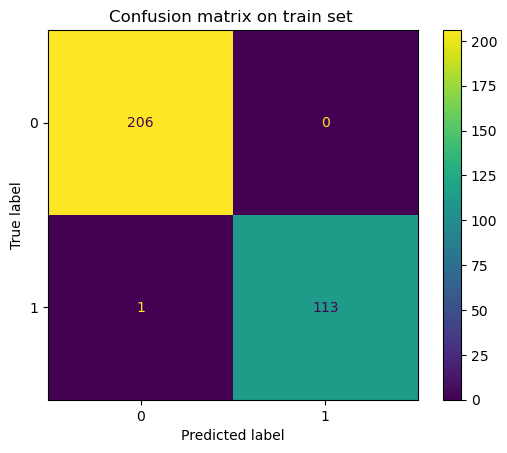

accuracy-score on train set :  0.996875


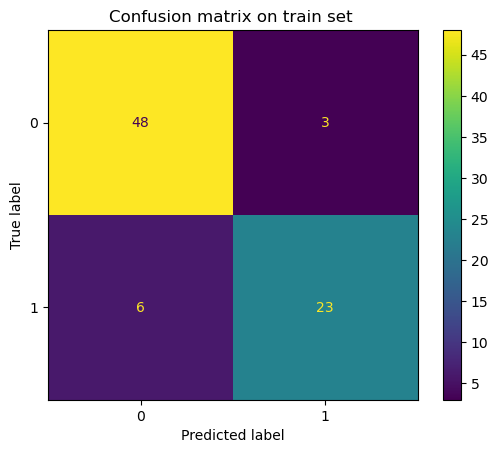

accuracy-score on test set :  0.8875


In [ ]:
### Assessment of performances ###
print("--- Assessment of performances ---")

# Plot confusion matrix
cm = confusion_matrix(y_train, y_train_pred, labels=classifier.classes_)
cm_display = ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
cm_display.ax_.set_title("Confusion matrix on train set ") # Simply to set a title
plt.show() # Show graph
print("accuracy-score on train set : ", classifier.score(X_train, y_train))


cm = confusion_matrix(y_test, y_test_pred, labels=classifier.classes_)
cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
cm_display.ax_.set_title("Confusion matrix on test set ") # Simply to set a title
plt.show() # Show graph
print("accuracy-score on test set : ", classifier.score(X_test, y_test))

## Step 4 - Feature importance

In [26]:
# Check coefficients 

print("coefficients are: ", classifier.feature_importances_) 

# Access transformers from feature_encoder
print("All transformers are: ", feature_encoder.transformers_)

# Access one specific transformer
print("One Hot Encoder transformer is: ", feature_encoder.transformers_[0][1])

# Print categories
categorical_column_names = feature_encoder.transformers_[0][1].categories_
print("Categorical columns are: ", categorical_column_names)

# Print numerical columns
numerical_column_names = X.iloc[:, numeric_features].columns # using the .columns attribute gives us the name of the column 
print("numerical columns are: ", numerical_column_names)

# Append all columns 
all_column_names = np.append(categorical_column_names, numerical_column_names)
print("All column names are: ",all_column_names)

# Feature importance 
feature_importance = pd.DataFrame({
    "feature_names": all_column_names,
    "coefficients": classifier.feature_importances_
                                        
})

feature_importance

coefficients are:  [0.0084655  0.00986047 0.49949569 0.48217834]
All transformers are:  [('cat', OneHotEncoder(), [0]), ('num', StandardScaler(), [1, 2])]
One Hot Encoder transformer is:  OneHotEncoder()
Categorical columns are:  [array(['Female', 'Male'], dtype=object)]
numerical columns are:  Index(['Age', 'EstimatedSalary'], dtype='object')
All column names are:  ['Female' 'Male' 'Age' 'EstimatedSalary']


,feature_names,coefficients
0,Female,0.008465
1,Male,0.009860
2,Age,0.499496
3,EstimatedSalary,0.482178


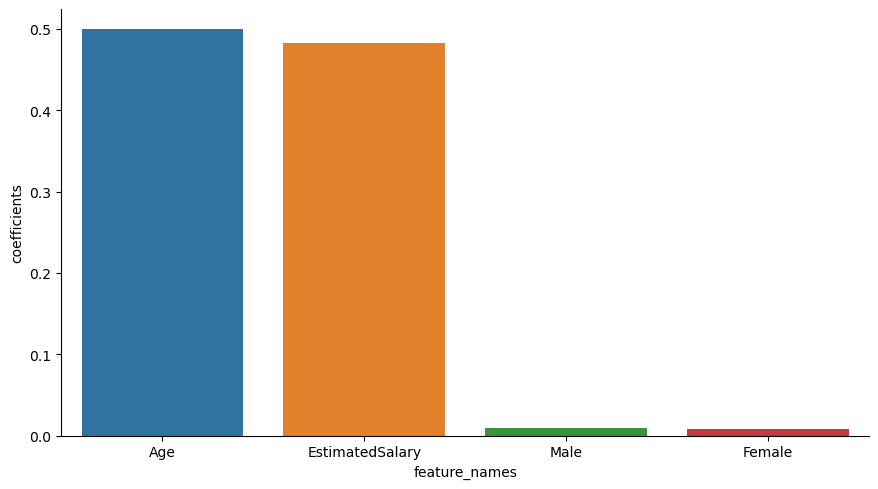

In [27]:
# Visualize ranked features using seaborn
sns.catplot(x="feature_names", 
            y="coefficients", 
            data=feature_importance.sort_values(by="coefficients", ascending=False), 
            kind="bar",
            aspect=16/9, # Resize graph
            hue="feature_names")